In [1]:
!pip install neuralprophet


In [1]:
!pip install fbprophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
ERROR: Could not build wheels for fbprophet, which is required to install pyproject.toml-based projects


In [2]:
!pip install prophet


  Using cached holidays-0.30-py3-none-any.whl (736 kB)
  Attempting uninstall: holidays
    Found existing installation: holidays 0.21.13
    Uninstalling holidays-0.21.13:
      Successfully uninstalled holidays-0.21.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
neuralprophet 1.0.0rc2 requires holidays<0.22,>=0.21, but you have holidays 0.30 which is incompatible.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet
from neuralprophet.utils import set_random_seed
from prophet import Prophet



data = pd.read_csv("/content/btc_dataset.csv")

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda20CUDACachingAllocator9allocatorE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(



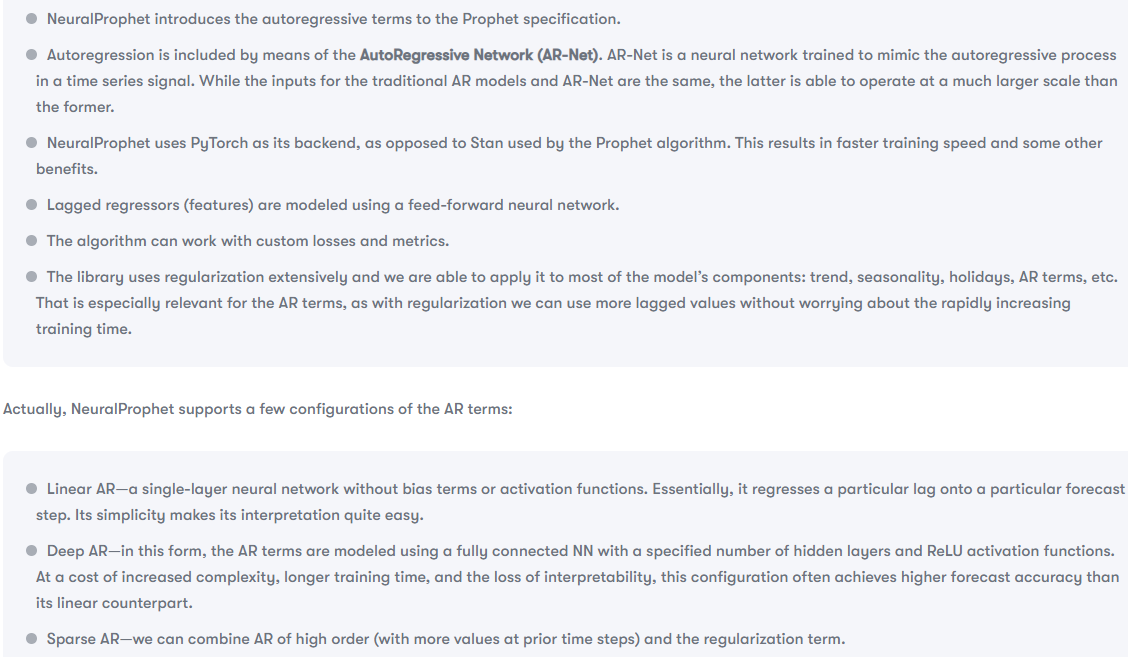

In [4]:
!pip install git+https://github.com/ourownstory/neural_prophet.git numpy==1.23.5


  Cloning https://github.com/ourownstory/neural_prophet.git to /tmp/pip-req-build-32uqk6v0
  Running command git clone --filter=blob:none --quiet https://github.com/ourownstory/neural_prophet.git /tmp/pip-req-build-32uqk6v0
  Resolved https://github.com/ourownstory/neural_prophet.git to commit 90f6e6ef72a6f616383dabe773f3d3805dbd4887
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached holidays-0.21.13-py3-none-any.whl (378 kB)
  Attempting uninstall: holidays
    Found existing installation: holidays 0.30
    Uninstalling holidays-0.30:
      Successfully uninstalled holidays-0.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.4 requires holidays>=0.25, but you have holidays 0.21.13 which is incompatible.


In [1]:
!pip uninstall prophet torchaudio torchtext torchvision torchdata

Found existing installation: prophet 1.1.4
Uninstalling prophet-1.1.4:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/prophet-1.1.4.dist-info/*
    /usr/local/lib/python3.10/dist-packages/prophet.libs/libtbb-3852fb27.so.2
    /usr/local/lib/python3.10/dist-packages/prophet.libs/libtbbmalloc-b1d47e5b.so.2
    /usr/local/lib/python3.10/dist-packages/prophet/*
Proceed (Y/n)? y
  Successfully uninstalled prophet-1.1.4
Found existing installation: torchaudio 2.0.2+cu118
Uninstalling torchaudio-2.0.2+cu118:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/torchaudio-2.0.2+cu118.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torchaudio/*
Proceed (Y/n)? y
  Successfully uninstalled torchaudio-2.0.2+cu118
Found existing installation: torchtext 0.15.2
Uninstalling torchtext-0.15.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/torchtext-0.15.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torchtext/*
Proceed (Y/n)? y
  Successfully uninsta

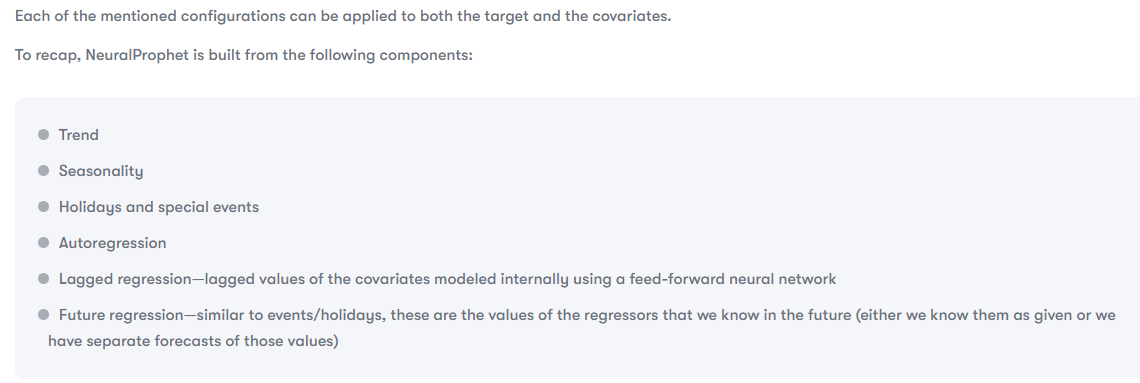

In [5]:

print(data.columns)


Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')


In [6]:
# If 'date' and 'close' are present, proceed with the preparation
data_model = data[['date', 'close']].copy()
data_model.rename(columns={'date': 'ds', 'close': 'y'}, inplace=True)
print(data_model.head())

                 ds        y
0  09/06/2023 00:00  26493.0
1  08/06/2023 23:00  26510.0
2  08/06/2023 22:00  26554.0
3  08/06/2023 21:00  26577.0
4  08/06/2023 20:00  26643.0


Create the train/test split:

In [7]:
TEST_LENGTH = 60
df_train = data.iloc[:-TEST_LENGTH]
df_test = data.iloc[-TEST_LENGTH:]
print(df_train.head())


         unix              date   symbol     open     high      low    close  \
0  1686268800  09/06/2023 00:00  BTC/USD  26507.0  26522.0  26493.0  26493.0   
1  1686265200  08/06/2023 23:00  BTC/USD  26547.0  26565.0  26498.0  26510.0   
2  1686261600  08/06/2023 22:00  BTC/USD  26571.0  26609.0  26536.0  26554.0   
3  1686258000  08/06/2023 21:00  BTC/USD  26644.0  26651.0  26555.0  26577.0   
4  1686254400  08/06/2023 20:00  BTC/USD  26537.0  26653.0  26522.0  26643.0   

   Volume BTC    Volume USD  
0   14.065790  3.726450e+05  
1   13.001130  3.446599e+05  
2   29.344521  7.792144e+05  
3   41.871368  1.112815e+06  
4  110.133306  2.934282e+06  


In [8]:
print(df_train.columns)


Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')


In [9]:
# Transform the df_train dataframe to have only 'ds' and 'y'
df_train = df_train[['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})

# Transform the df_test dataframe similarly
df_test = df_test[['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})

# Now, fit the Prophet model to the transformed df_train
model = Prophet()
model.fit(df_train)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04ucy18m/hlpphtal.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04ucy18m/xh55r2bq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36331', 'data', 'file=/tmp/tmp04ucy18m/hlpphtal.json', 'init=/tmp/tmp04ucy18m/xh55r2bq.json', 'output', 'file=/tmp/tmp04ucy18m/prophet_modelmz959d0j/prophet_model-20230810000145.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:01:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:02:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [10]:
from neuralprophet import NeuralProphet, set_random_seed


In [11]:
set_random_seed(42)
model = NeuralProphet(changepoints_range=0.95)


Train the default Prophet model and plot the evaluation metrics:


In [12]:
# from neuralprophet import NeuralProphet
# model = NeuralProphet(changepoints_range=0.95)

# metrics = model.fit(df_train, freq="B")
# Frequency Mismatch: NeuralProphet detected that the majority of your data is hourly (H), but you've set the frequency to business days (B). To address this, adjust the frequency parameter to match the nature of your data.

# metrics = model.fit(df_train, freq="H")


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency -1H corresponds to 98.244% of the data.
INFO:NP.df_utils:Major frequency -1H corresponds to 98.244% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency -1H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO:NP.config:Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 70
INFO:NP.config:Auto-set epochs to 70


Finding best initial lr:   0%|          | 0/266 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency -1H corresponds to 98.244% of the data.
INFO:NP.df_utils:Major frequency -1H corresponds to 98.244% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency -1H
INFO - (NP.df_utils._infer_frequency) - Major frequency -1H corresponds to 98.244% of the data.
INFO:NP.df_utils:Major frequency -1H corresponds to 98.244% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency -1H


Predicting: 695it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


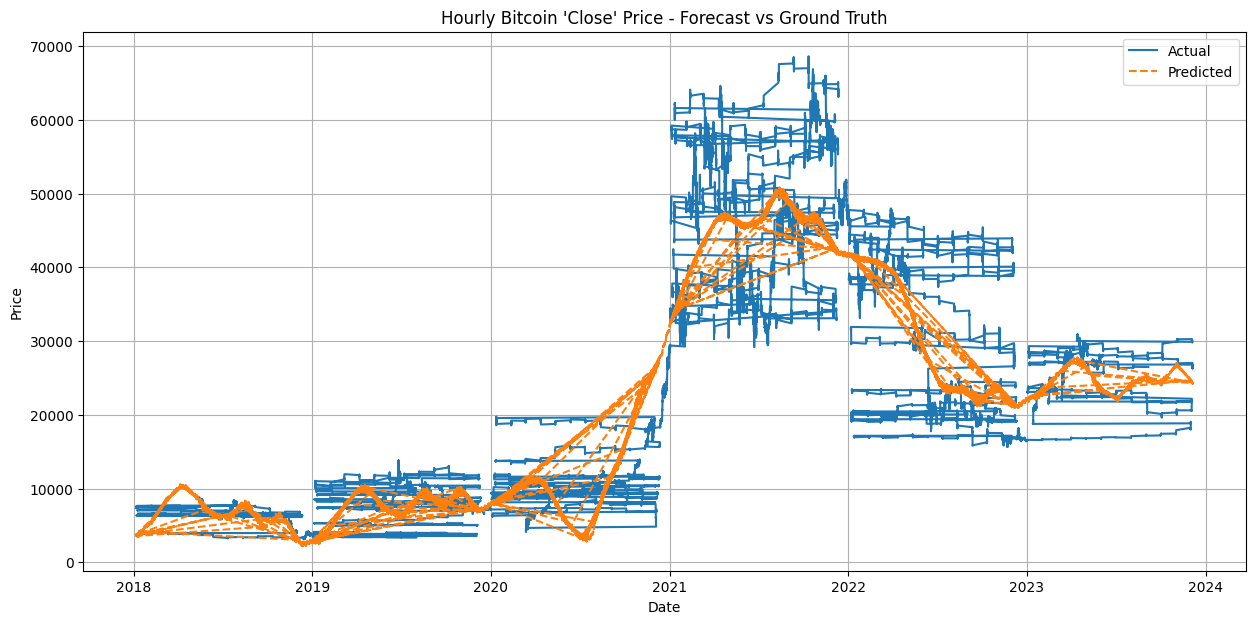

In [2]:
# 1. Import necessary libraries
import pandas as pd
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt

data = pd.read_csv("/content/btc_dataset.csv")

# 3. Prepare the dataframe for NeuralProphet
df = data[['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})

# 4. Initialize and train the NeuralProphet model
model = NeuralProphet(changepoints_range=0.95)
model.fit(df, freq="H")

# 5. Make predictions
pred_df = model.predict(df)



# Now, let's plot the actual vs. predicted values
plt.figure(figsize=(15, 7))
plt.plot(pred_df['ds'], df['y'], label='Actual')
plt.plot(pred_df['ds'], pred_df['yhat1'], label='Predicted', linestyle='--')
plt.title("Hourly Bitcoin 'Close' Price - Forecast vs Ground Truth")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


adding AR to NeuralProphet


In [13]:
# 1. Import necessary libraries
import pandas as pd
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt
import numpy as np
import torch

# Set seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# 2. Load your dataset
data = pd.read_csv("/content/btc_dataset.csv")

# 3. Prepare the dataframe for NeuralProphet
df = data[['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})

# Drop rows with NaN values
df.dropna(inplace=True)

# 4. Split the data into train and test sets (80-20 split)
train_size = int(0.8 * len(df))
df_train, df_test = df[:train_size], df[train_size:]

# 5. Initialize the NeuralProphet model
model = NeuralProphet(
    changepoints_range=0.95,
    n_lags=10,
    ar_reg=1,
)

# 6. Fit the model
metrics = model.fit(df_train, freq="H")

# 7. Make predictions
pred_df = model.predict(df_test)

# 8. Plot the actual vs. predicted values
plt.figure(figsize=(15, 7))
plt.plot(df_test['ds'], df_test['y'], label='Actual')
plt.plot(pred_df['ds'], pred_df['yhat1'], label='Predicted', linestyle='--')
plt.title("Hourly Bitcoin 'Close' Price - Forecast vs Ground Truth")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency -1H corresponds to 98.238% of the data.
INFO:NP.df_utils:Major frequency -1H corresponds to 98.238% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency -1H
INFO - (NP.data.processing._handle_missing_data) - Added 7545 missing dates.
INFO:NP.data.processing:Added 7545 missing dates.
WARNING - (NP.data.processing._handle_missing_data) - 7545 missing values in column y were detected in total. 
INFO - (NP.data.processing._handle_missing_data) - 460 NaN values in column y were auto-imputed.
INFO:NP.data.processing:460 NaN values in column y were auto-imputed.
WARNING - (NP.data.processing._handle_missing_data) - More than 30 consecutive                             missing values encountered in column y. 7085 NA remain after auto-imputation. 
INFO - (NP.config

ValueError: ignored

In [ ]:
# # # Importing the necessary libraries
# # import pandas as pd
# # import matplotlib.pyplot as plt
# # from neuralprophet import NeuralProphet

# # # Load the data
# # data = pd.read_csv("/content/btc_dataset.csv")

# # # Prepare the dataframe for NeuralProphet
# # df = data[['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})

# # # Initialize and train the NeuralProphet model
# # model = NeuralProphet(changepoints_range=0.95)
# # model.fit(df, freq="H")

# # # Make predictions
# pred_df = model.predict(df)

# # Now, let's plot the actual vs. predicted values
# plt.figure(figsize=(15, 7))
# plt.plot(pred_df['ds'], df['y'], label='Actual')
# plt.plot(pred_df['ds'], pred_df['yhat1'], label='Predicted', linestyle='--')
# plt.title("Hourly Bitcoin 'Close' Price - Forecast vs Ground Truth")
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.grid(True)
# plt.show()





Calculate the predictions and plot the fit: